<div style="border:solid steelblue 3px; padding: 20px">
<font size="5"><b><center> Analyzing A/B test results</b></font>


  Sub-steps :
<p>- Construction of a graph of cumulative revenue by groups.
<p>- Plotting a graph of the cumulative average bill by groups.
<p>- Construction of a graph of the relative change in the cumulative average check of group B to group A.
<p>- Plotting the cumulative average number of orders per visitor by groups.
<p>- Plotting the relative change in the cumulative average number of orders per visitor of group B to group A.
<p>- Building a scatter plot of the number of orders by users.
<p>- Calculation of the 95th and 99th percentile of the number of orders per user. Boundary definition for anomalous users.
<p>- Building a scatter plot of order costs.
<p>- Calculation of the 95th and 99th percentiles of the cost of orders. Boundary definition for anomalous orders.
<p>- Calculation of statistical significance of differences in the average number of orders per visitor between groups according to "raw" data.
<p>- Calculation of statistical significance of differences in the average check of an order between groups according to "raw" data.
<p>- Calculation of statistical significance of differences in the average number of orders per visitor between groups according to "cleaned" data.
<p>- Calculation of the statistical significance of differences in the average check of the order between groups according to the "cleaned" data. Make inferences and assumptions.
<p>- Making a decision based on the results of the test. Solution options:

## Conclusion
### Upon completion of the assessment of the statistical significance of the results obtained as a result of the A / B test, the following picture emerges:
<p> Н0 - The hypothesis about the equality of the number of orders for the control group and the test group is not confirmed (both according to the data processed from outliers and not) - an increase in the average number of orders is observed (by about 17%)
H0 - The hypothesis about the equality of average bills could not be refuted. The p-value is above the level of the significance test, although the relative difference for the "cleaned" data has changed not in favor of group B (outliers, apparently, are more typical not for the control group). It is not necessary to expect that the average check will change in favor of the test group.
You need to choose from 3 options for the outcome of the test, relying on the final goals that were set for this test. The number of orders has increased, the average check has not, and the logic suggests that such a result should have happened (taking into account the increase in the average number of orders). Those. user behavior has not changed, there is a need to buy more often. The most appropriate, in my opinion, would be the choice of the option "Stop the test, record the victory of group B".

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
pd.set_option('display.max_colwidth', None)
import scipy.stats as stats

In [6]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    orders = pd.read_csv('orders.csv')    

In [7]:
try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    visitors = pd.read_csv('visitors.csv')

In [8]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
orders['date'] = pd.to_datetime(orders['date'])

In [12]:
orders.isna().mean()

transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64

In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [15]:
visitors.isna().mean()

date        0.0
group       0.0
visitors    0.0
dtype: float64

In [16]:
orders.duplicated().sum()

0

In [17]:
visitors.duplicated().sum()

0

In [18]:
duplicates = orders[orders['group'] == 'A'].merge(orders[orders['group'] == 'B'], how='left', right_on='visitorId', left_on='visitorId')
len(duplicates[(duplicates['group_x'] == 'A') & (duplicates['group_y'] == 'B')]) * 2

366

The number of users who are simultaneously in two groups

In [19]:
len(orders.groupby('visitorId', as_index=False)['group'].nunique().query('group > 1'))

58

Number of unique users of group A

In [20]:
orders[orders['group'] == 'A']['visitorId'].nunique()

503

Number of unique users in group B

In [21]:
orders[orders['group'] == 'B']['visitorId'].nunique()

586

In [22]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        (
            orders['date'] <= x['date']) & (orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1
).sort_values(by=['date', 'group'])

In [52]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [53]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[(visitors['date'] <= x['date']) & (visitors['group'] == x['group'])
        
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1
).sort_values(by=['date', 'group'])


In [54]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

In [55]:
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

In [56]:
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


### Graph of cumulative revenue

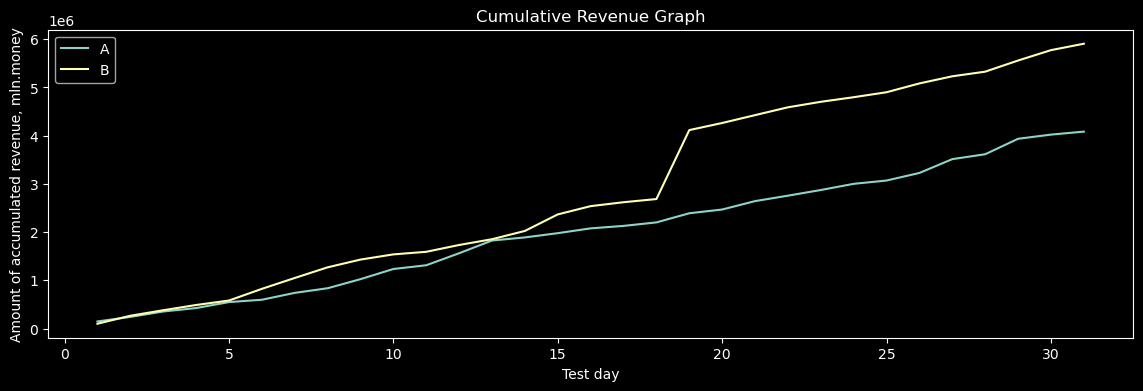

In [57]:
plt.figure(figsize=(14, 4))
plt.plot(cumulativeData[cumulativeData['group'] == 'A']['date'].dt.day, cumulativeData[cumulativeData['group'] == 'A']['revenue'], label= 'A')
plt.plot(cumulativeData[cumulativeData['group'] == 'B']['date'].dt.day, cumulativeData[cumulativeData['group'] == 'B']['revenue'], label= 'B')
plt.legend()
plt.title('Cumulative Revenue Graph')
plt.xlabel('Test day')
plt.ylabel('Amount of accumulated revenue, mln.money');

#### The graph of cumulative revenue shows that at the beginning of the test (up to day 5) both indicators show approximately the same results. Further, group B pulls ahead a little and the difference between the groups in favor of group B increases over time, leveling off at day 13. On the 18th day of the test, a sharp increase in the considered indicator of group B is noticeable, this allows us to assume a potential statistical outlier (either there were expensive orders, or the number of orders increased sharply in this period of time, or both).

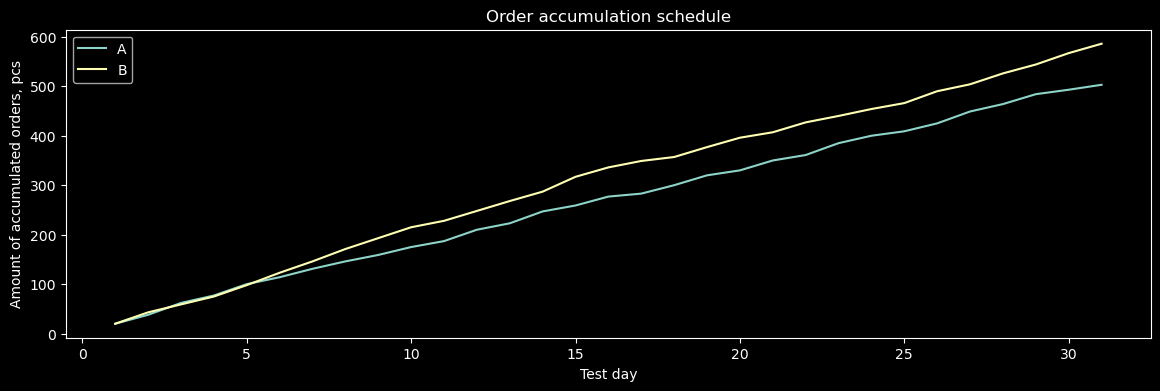

In [58]:
plt.figure(figsize=(14, 4))
plt.plot(cumulativeData[cumulativeData['group'] == 'A']['date'].dt.day, cumulativeData[cumulativeData['group'] == 'A']['buyers'], label= 'A')
plt.plot(cumulativeData[cumulativeData['group'] == 'B']['date'].dt.day, cumulativeData[cumulativeData['group'] == 'B']['buyers'], label= 'B')
plt.legend()
plt.title('Order accumulation schedule')
plt.xlabel('Test day')
plt.ylabel('Amount of accumulated orders, pcs');

#### The difference in the number of orders between the groups is also observed, but it is growing quite smoothly, and it would be unfair to say that revenue has gone ahead sharply due to an increase in the number of orders.

### Graph of the cumulative average ticket

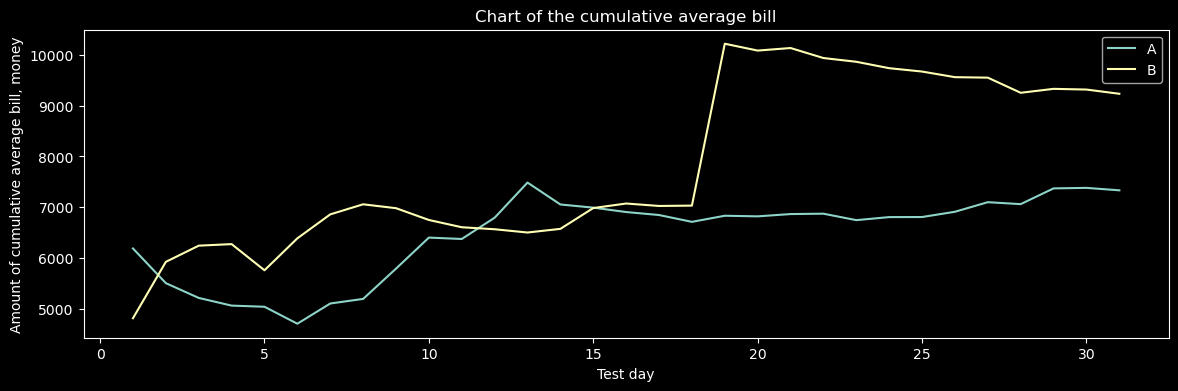

In [59]:
plt.figure(figsize=(14, 4))
(plt.plot(cumulativeData[cumulativeData['group'] == 'A']['date'].dt.day,
           cumulativeData[cumulativeData['group'] == 'A']['revenue'] /
           cumulativeData[cumulativeData['group'] == 'A']['orders'], label='A'))
(plt.plot(cumulativeData[cumulativeData['group'] == 'B']['date'].dt.day,
           cumulativeData[cumulativeData['group'] == 'B']['revenue'] /
           cumulativeData[cumulativeData['group'] == 'B']['orders'], label='B'))
plt.legend()
plt.title('Chart of the cumulative average bill')
plt.xlabel('Test day')
plt.ylabel('Amount of cumulative average bill, money');

#### The cumulative average check of both groups fluctuates a lot. Starting from the 6th to the 13th day of the test, group A is characterized by 3 noticeable rises. Day 18 of the test for group B also skyrocketed. There is nothing more to say yet, it is necessary to deal with emissions.

### Graph of the relative change in the cumulative average check of group B to group A.

In [60]:
mergedCumulutiveDataA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders', 'visitors']]

In [61]:
mergedCumulutiveDataB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders', 'visitors']]

In [62]:
mergedCumulutiveData = mergedCumulutiveDataA.merge(mergedCumulutiveDataB, left_on='date', right_on='date',how='left' , suffixes=['A', 'B'])

In [63]:
mergedCumulutiveData.head(5)

,date,revenueA,ordersA,visitorsA,revenueB,ordersB,visitorsB
0,2019-08-01,148579,24,719,101217,21,713
1,2019-08-02,242401,44,1338,266748,45,1294
2,2019-08-03,354874,68,1845,380996,61,1803
3,2019-08-04,425699,84,2562,489567,78,2573
4,2019-08-05,549917,109,3318,581995,101,3280


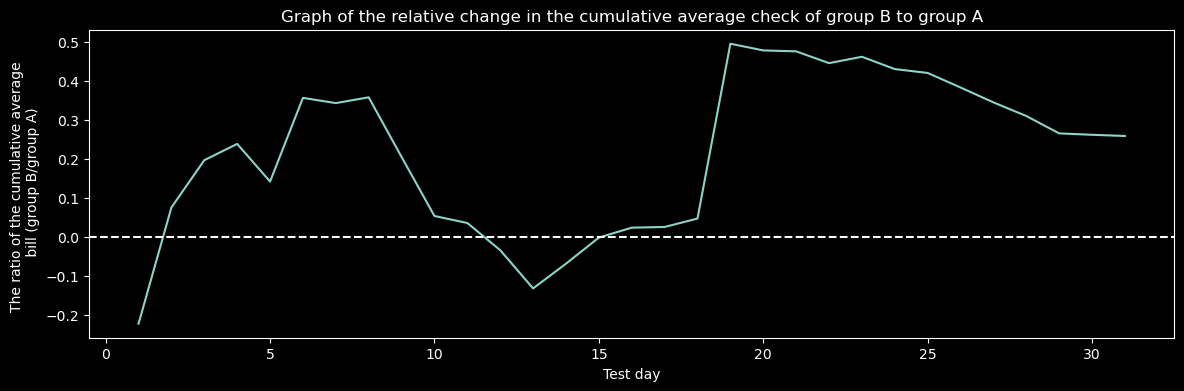

In [66]:
plt.figure(figsize=(14, 4))
(plt.plot(mergedCumulutiveData['date'].dt.day,
          (mergedCumulutiveData['revenueB'] / 
          mergedCumulutiveData['ordersB']) / (mergedCumulutiveData['revenueA'] / 
          mergedCumulutiveData['ordersA']) - 1))
plt.axhline(y=0, color='white', linestyle='--')
plt.title('Graph of the relative change in the cumulative average check of group B to group A')
plt.xlabel('Test day')
plt.ylabel('The ratio of the cumulative average \n bill (group B/group A)');

#### Group B generally performs better than group A, with the exception of day 13 of the test, when group A showed a spike in growth, and also on day 18 of the test, where a strong outlier gave group B a strong advantage in the relative difference in the average check. The data is in desperate need of outlier filtering (true for both groups).

### Graph of the cumulative average number of orders per visitor by group

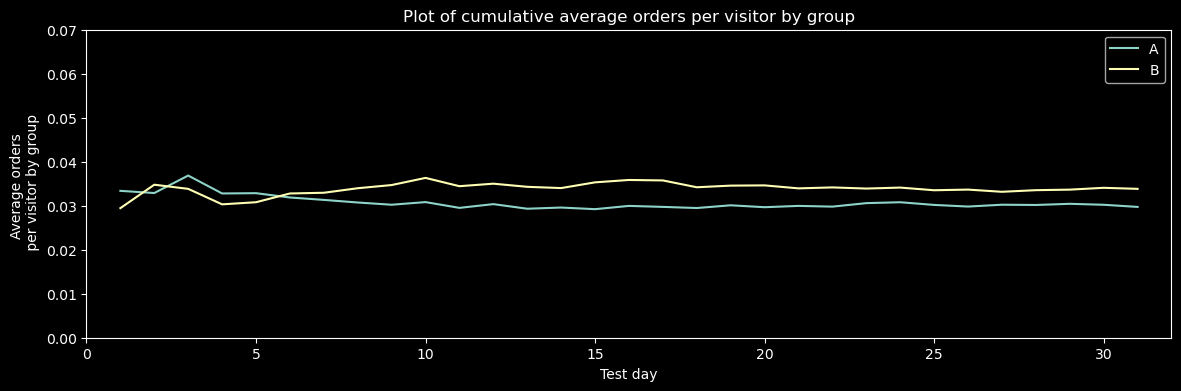

In [67]:
plt.figure(figsize=(14, 4))
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']
plt.plot(cumulativeDataA['date'].dt.day, cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'].dt.day, cumulativeDataB['conversion'], label='B')
plt.legend()
plt.axis([0, 32, 0, 0.07])
plt.title('Plot of cumulative average orders per visitor by group')
plt.xlabel('Test day')
plt.ylabel('Average orders \n per visitor by group');

#### In the first week of the test gr. And it was better than B, then group B took the lead on days 6-7 and, starting from the 17th day of the test, they fixed at relative values of ~ 0.35 for group B and ~ 0.3 for group A.

### Graph of the relative change in the cumulative average number of orders per visitor of group B to group A

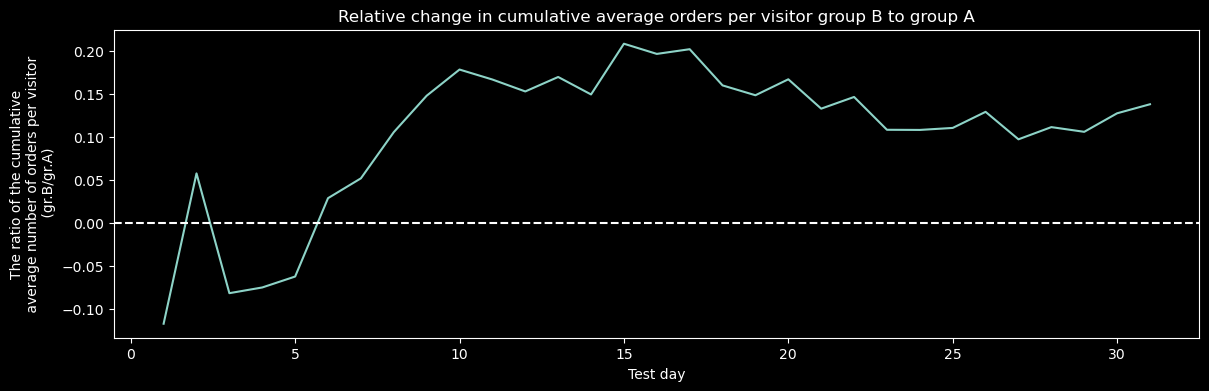

In [69]:
plt.figure(figsize=(14, 4))
(plt.plot(mergedCumulutiveData['date'].dt.day,
          (mergedCumulutiveData['ordersB'] / 
          mergedCumulutiveData['visitorsB']) / (mergedCumulutiveData['ordersA'] / 
          mergedCumulutiveData['visitorsA']) - 1))
plt.axhline(y=0, color='white', linestyle='--')
plt.title('Relative change in cumulative average orders per visitor group B to group A')
plt.xlabel('Test day')
plt.ylabel('The ratio of the cumulative\n average number of orders per visitor \n (gr.B/gr.A)');

#### The relative change in the number of orders per group shows the advantage of group B over group A (fixed at 0.15), although at the beginning of the test (3-5 days) the advantage in this indicator was on the side of group A.

### Scatter plot of the number of orders by users

In [70]:
orders_rouped_by_visitors = orders.groupby('visitorId', as_index=False).agg({'visitorId':'max', 'transactionId':'nunique'})

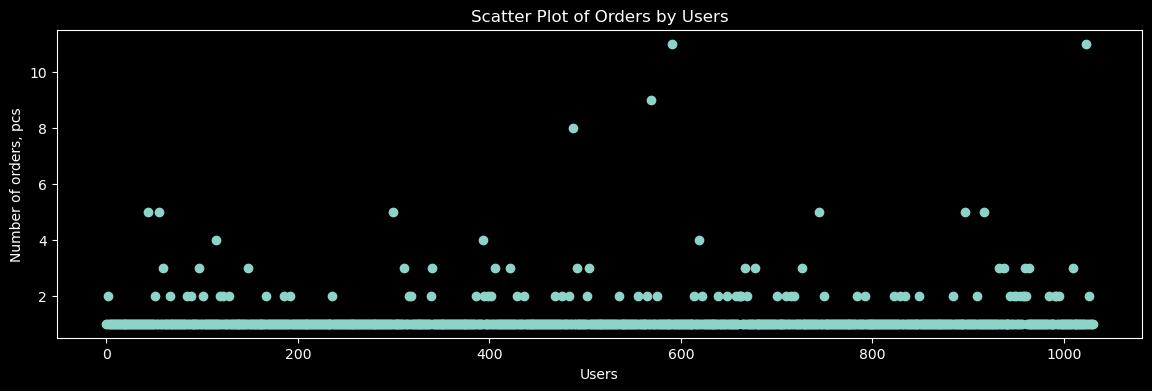

In [71]:
plt.figure(figsize=(14, 4))
x_values = list(range(0,len(orders_rouped_by_visitors)))
plt.scatter(x_values, orders_rouped_by_visitors['transactionId'])
plt.title('Scatter Plot of Orders by Users')
plt.xlabel('Users')
plt.ylabel('Number of orders, pcs');

#### Judging by this diagram, the majority of users make orders in the amount of 1 piece, which will be an average value, less often 2, and much less than 3. There are users who have made an order 11 times.

In [72]:
np.percentile(orders_rouped_by_visitors['transactionId'], [95, 99])

array([2., 4.])

#### 5% of users order no more than 2 times and 1% of users order no more than 4 times. UPD. I made the choice of the border in the block below, I will write here - I choose the border by 5%

### Scatter plot of order values

In [73]:
x_values = list(range(0,len(orders)))

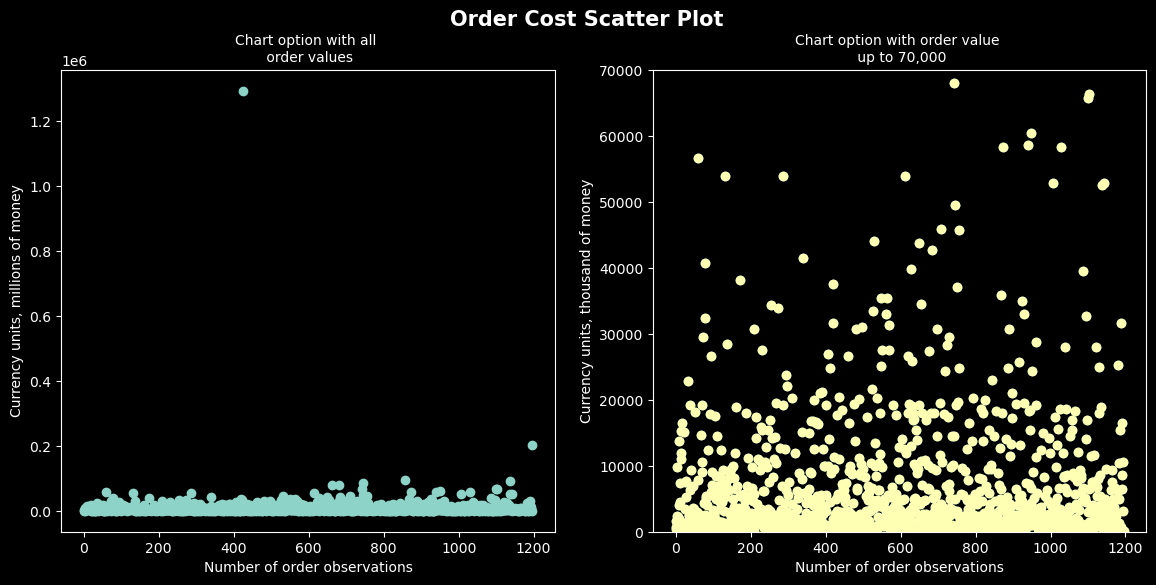

In [74]:
fig, axs = plt.subplots(1, 2, figsize = (14,6))
fig.suptitle('Order Cost Scatter Plot', fontsize = 15, fontweight='bold')
plt.scatter(x_values, orders['revenue'])
plt.ylim(0, 70000)
axs[0].scatter(x_values, orders['revenue'])
axs[0].set_title('Chart option with all \n order values', font='sans', fontsize = 10)

axs[0].set_xlabel('Number of order observations')
axs[0].set_ylabel('Currency units, millions of money')
axs[1].scatter(x_values, orders['revenue'])
axs[1].set_title('Chart option with order value \n up to 70,000', font='sans', fontsize=10)
axs[1].set_xlabel('Number of order observations')
axs[1].set_ylabel('Currency units, thousand of money')
plt.show()

In [75]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

#### The scatter chart shows one huge outlier - by 1.2 million (most likely it raised the average check metric on the 18th day of the test). 5% of orders worth no more than 28,000 and 1% of orders no more than 58,000. Here, as in the previous study on the number of orders, I will choose a border of 5 percent to reduce the impact of high rates on the test results.

### Statistical significance of differences in the average number of orders per visitor between groups according to "raw" data

#### Testing the hypothesis about the difference in the average number of orders for users of the control group and group B according to raw data (not cleared of outliers). H0 - there are no differences in the average number of orders per visitor, H1 - there are differences. The significance criterion is set to 0.05. Statistical test - nonparametric Mann-Whitney test.

In [76]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
     lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
         {'date': 'max', 'visitorsPerDateA': 'sum'}
     ),
     axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
     lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
         {'date': 'max', 'visitorsPerDateB': 'sum'}
     ),
     axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
     orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
     .groupby('date', as_index=False)
     .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
     lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
         {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
     ),
     axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
     'date',
     'ordersCummulativeA',
     'revenueCummulativeA',
]

ordersBDaily = (
     orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
     .groupby('date', as_index=False)
     .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
     lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
         {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
     ),
     axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
     'date',
     'ordersCummulativeB',
     'revenueCummulativeB',
]

data = (
     ordersADaily.merge(
         ordersBDaily, left_on='date', right_on='date', how='left'
     )
     .merge(ordersACummulative, left_on='date', right_on='date', how='left')
     .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
     .merge(visitorsADaily, left_on='date', right_on='date', how='left')
     .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
     .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
     .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


ordersByUsersA = (
     orders[orders['group'] == 'A']
     .groupby('visitorId', as_index=False)
     .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
     orders[orders['group'] == 'B']
     .groupby('visitorId', as_index=False)
     .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name= 'orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name= 'orders')],axis=0)

print("P-value {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Relative difference gr.B/gr.A {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value 0.017
Relative difference gr.B/gr.A 0.138


#### P-value 0.017 - the difference in "raw" data between groups A and B is statistically significant, we reject the null hypothesis about the equality of the two groups in terms of the average number of orders, with a relative advantage of group B by ~ 14%.

### Statistical significance of differences in the average order receipt between groups according to "raw" data.

#### Testing the hypothesis about the difference in the average order receipt for users in the control group and group B according to raw data (not cleared of outliers). H0 - there are no differences in the average check of the order between the users of the two groups, H1 - there are differences. The significance criterion is set to 0.05. Statistical test - nonparametric Mann-Whitney test.

In [77]:
print('P-value {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']== 'B']['revenue'])[1]))
print('Relative difference group B/group A {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders[ 'group']=='A']['revenue'].mean()-1))

P-value 0.729
Relative difference group B/group A 0.259


#### P-value 0.729 - It is impossible to reject the null hypothesis about the equality of the two groups in terms of the average check of the order, the relative difference is again behind group B (26%). Taking into account the P-value, we can conclude that the relative difference was obtained by chance with a high probability.

### Statistically significant differences in the average number of orders per visitor between groups on "cleaned" data

#### Testing the hypothesis about the difference in the average number of orders for users of the control group and group B according to the cleaned data (without outliers). The significance criterion is set to 0.05. Statistical test - nonparametric Mann-Whitney test.

In [78]:
usersWithManyOrders = pd.concat(
     [
         ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
         ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
     ],
     axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
     pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
     .drop_duplicates()
     .sort_values()
)
sampleAFiltered = pd.concat(
     [
         ordersByUsersA[
             np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
         ]['orders'],
         pd.Series(
             0,
             index=np.arange(
                 data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
             ),
             name='orders',
         ),
     ],
     axis=0,
)

sampleBFiltered = pd.concat(
     [
         ordersByUsersB[
             np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
         ]['orders'],
         pd.Series(
             0,
             index=np.arange(
                 data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
             ),
             name='orders',
         ),
     ],
     axis=0,
)
print('P-value {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Relative difference gr.B/gr.A {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value 0.013
Relative difference gr.B/gr.A 0.173


#### The output for the "cleared" data on the number of orders does not change. The difference is still statistically significant. The probability of getting such or even more extreme difference between the two groups is 1.3%, which means that the obtained value, sorry for the tautology, was not obtained by chance, the null hypothesis about the equality of the two average samples is rejected. The relative difference between the two groups settled at 0.17 in favor of the test group. The value of this metric increased compared to the "raw" data variant (it was 0.14).

### Statistical significance of differences in the average check of an order between groups according to "cleaned" data.

#### Testing the hypothesis about the difference in the average order receipt for users of the control group and group B according to data cleared of outliers. H0 - there are no differences in the average order receipt between users of the two groups, H1 - there are differences. The significance criterion is set to 0.05. Statistical test - nonparametric Mann-Whitney test.

In [79]:
print(
     'P-value {0:.3f}'.format(
         stats.mannwhitneyu(
             orders[
                 np.logical_and(
                     orders['group'] == 'A',
                     np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                 )
             ]['revenue'],
             orders[
                 np.logical_and(
                     orders['group'] == 'B',
                     np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                 )
             ]['revenue'],
         )[1]
     )
)

print(
     "Relative difference gr.B/gr.A {0:.3f}".format(
         orders[
             np.logical_and(
                 orders['group'] == 'B',
                 np.logical_not(orders['visitorId'].isin(abnormalUsers)),
             )
         ]['revenue'].mean()
         / orders[
             np.logical_and(
                 orders['group'] == 'A',
                 np.logical_not(orders['visitorId'].isin(abnormalUsers)),
             )
         ]['revenue'].mean()
         - 1
     )
)

P-value 0.738
Relative difference gr.B/gr.A -0.020


#### Can't reject the null hypothesis. P-value is above the significance criterion of 0.05. The relative difference in the average check is negative for group B and amounted to -0.020, the result has changed a lot compared to the raw data, however, taking into account the P-value, we can say that such a difference, as in the case of "raw data", is statistically insignificant , and with high probability obtained by chance.